<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

# **Análisis de datos**
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Juan Sebastian Malagón Torres
2. Fabio Gonzalez
3. Angel  Cruz

In [ ]:
!pip install lifelines

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from lifelines import KaplanMeierFitter

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data = pd.read_csv('/content/drive/MyDrive/MLDS1/Material/05 . A analisis de datos/data/clean_clinical.csv')
data.head()

,bcr_patient_barcode,vital_status,age_at_initial_pathologic_diagnosis,tissue_prospective_collection_indicator,radiation_therapy,lymph_node_examined_count,breast_carcinoma_surgical_procedure_name,menopause_status,pathologic_T,pathologic_N,pathologic_M,pathologic_stage,Time
0,TCGA-E2-A1BD,Alive,53,NO,YES,1.0,Lumpectomy,Post (prior bilateral ovariectomy OR >12 mo si...,T2,N0,M0,Stage II,1133.0
1,TCGA-BH-A0AW,Alive,56,NO,YES,12.0,Lumpectomy,Post (prior bilateral ovariectomy OR >12 mo si...,T1,N1,M0,Stage II,622.0
2,TCGA-AO-A0JB,Alive,50,NO,YES,14.0,Modified Radical Mastectomy,Pre (<6 months since LMP AND no prior bilatera...,T3,N1,M0,Stage III,1542.0
3,TCGA-D8-A1JN,Alive,80,YES,NO,13.0,Modified Radical Mastectomy,Post (prior bilateral ovariectomy OR >12 mo si...,T3,N3,MX,Stage III,620.0
4,TCGA-EW-A1P8,Dead,58,NO,NO,15.0,Lumpectomy,Post (prior bilateral ovariectomy OR >12 mo si...,T2,N3,M0,Stage III,239.0


## **1. Análisis y resultados**
---

Al adentrarse en el análisis de datos, es crucial adoptar un enfoque estratégico que responda a las preguntas de planteadas en el proyecto. La selección de variables para estudio requiere una evaluación cuidadosa de los objetivos específicos del proyecto, priorizando aquellas que se consideren fundamentales para obtener resultados significativos.

A lo largo de esta entrega, trate busque responder las siguientes preguntas

- ¿Cómo se aplicaron conceptos específicos de estadística descriptiva e inferencial en el análisis de datos y cuál fue el enfoque utilizado para interpretar los resultados de manera precisa?
- ¿Cómo se interpretaron los resultados de la estadística descriptiva y qué conclusiones se pueden extraer?
- ¿Cómo se relacionan los resultados del análisis de datos con los objetivos y preguntas planteadas inicialmente?
- ¿Qué implicaciones prácticas tienen los hallazgos y cómo podrían influir en la toma de decisiones?

### **1.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.
- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.
- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?


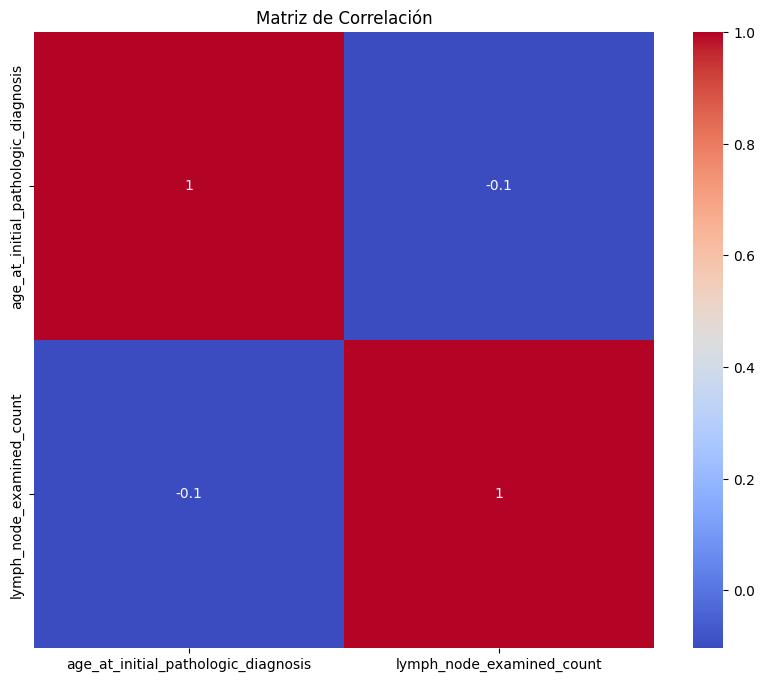

In [ ]:
#variables continuas
numeric = ['age_at_initial_pathologic_diagnosis', 'lymph_node_examined_count']
numeric_data = data[numeric]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [24]:
chi_sq_result

Chi2ContingencyResult(statistic=4252.0, pvalue=0.0, dof=16, expected_freq=array([[ 30.81937912, 102.5042333 ,  40.35465663,   3.40545626,
          3.91627469],
       [102.5042333 , 340.92568203, 134.21825024,  11.32643462,
         13.02539981],
       [ 40.35465663, 134.21825024,  52.84007526,   4.45907808,
          5.12793979],
       [  3.40545626,  11.32643462,   4.45907808,   0.37629351,
          0.43273754],
       [  3.91627469,  13.02539981,   5.12793979,   0.43273754,
          0.49764817]]))

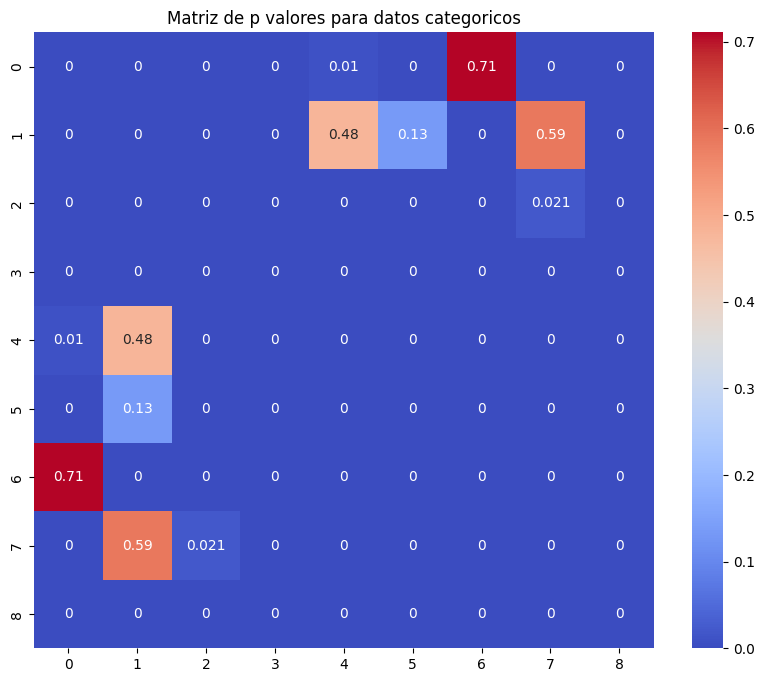

In [26]:
categorical = ['tissue_prospective_collection_indicator', 'radiation_therapy',
       'lymph_node_examined_count', 'breast_carcinoma_surgical_procedure_name',
       'menopause_status', 'pathologic_T', 'pathologic_N', 'pathologic_M',
       'pathologic_stage']

categorical_data = data[categorical]
corr = np.zeros([len(categorical), len(categorical)])

for i in range (len(categorical)):
  for j in range (len(categorical)):
    column_a, column_b = categorical_data[categorical[i]], categorical_data[categorical[j]]
    cross_tab=pd.crosstab(index=column_a,columns=column_b)
    chi_sq_result = chi2_contingency(cross_tab,)
    corr[i,j] = chi_sq_result.pvalue

plt.figure(figsize=(10, 8))
sns.heatmap(corr*(corr>0.05/len(categorical)), annot=True, cmap='coolwarm')
plt.title('Matriz de p valores para datos categoricos')
plt.show()

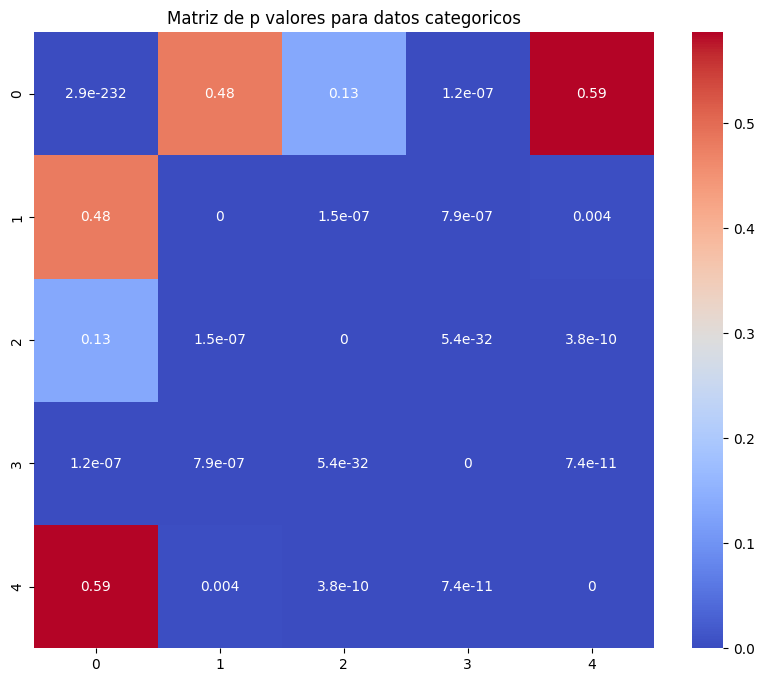

In [27]:
categorical_notcorr = ['radiation_therapy', 'menopause_status', 'pathologic_T', 'pathologic_N', 'pathologic_M']
categorical_data = data[categorical_notcorr]
corr = np.zeros([len(categorical_notcorr), len(categorical_notcorr)])

for i in range (len(categorical_notcorr)):
  for j in range (len(categorical_notcorr)):
    column_a, column_b = categorical_data[categorical_notcorr[i]], categorical_data[categorical_notcorr[j]]
    cross_tab=pd.crosstab(index=column_a,columns=column_b)
    chi_sq_result = chi2_contingency(cross_tab,)
    corr[i,j] = chi_sq_result.pvalue

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de p valores para datos categoricos')
plt.show()

In [17]:
one_hot_categorical = ['radiation_therapy', 'menopause_status', 'pathologic_T', 'pathologic_N', 'pathologic_M']
label_categorical = ['vital_status']
non_transform = ['Time', 'age_at_initial_pathologic_diagnosis', 'lymph_node_examined_count']

adapted_data = pd.DataFrame()
# Non transformed variables
adapted_data[non_transform] = data[non_transform]
#Label encoding variables
adapted_data[label_categorical] = data[label_categorical]
adapted_data[label_categorical] = adapted_data[label_categorical].replace('Alive',0)
adapted_data[label_categorical] = adapted_data[label_categorical].replace('Dead',1)
#One Hote encoding variables
for column_name in one_hot_categorical:
    one_hot_column = pd.get_dummies(data[column_name], prefix = column_name)
    columns, values = np.array(one_hot_column.columns), np.array(one_hot_column.sum())
    one_hot_column = one_hot_column.drop(columns = columns[values==np.max(values)])
    adapted_data[one_hot_column.columns] = one_hot_column

adapted_data = adapted_data*1
adapted_data.head()

,Time,age_at_initial_pathologic_diagnosis,lymph_node_examined_count,vital_status,radiation_therapy_NO,menopause_status_Indeterminate (neither Pre or Postmenopausal),menopause_status_Pre (<6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement),pathologic_T_T1,pathologic_T_T3,pathologic_T_T4,pathologic_T_TX,pathologic_N_N1,pathologic_N_N2,pathologic_N_N3,pathologic_N_NX,pathologic_M_M1,pathologic_M_MX
0,1133.0,53,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,622.0,56,12.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1542.0,50,14.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,620.0,80,13.0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4,239.0,58,15.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


### **1.2. Análisis de regresiones**
---

- Apartir de las correlaciones identificadas, ¿es posible llevar a cabo un análisis de regresiones para estimar el valor de alguna de las variables de interés?
- ¿Cuáles fueron las variables seleccionadas para el análisis de regresiones y cómo se eligieron en función de los objetivos del proyecto?


In [18]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(adapted_data, duration_col = 'Time', event_col = 'vital_status')
print(f'C-index: {cph.concordance_index_}')

C-index: 0.745499042678031


### **1.3. Estadística inferencial (Opcional)**
---

- ¿Resulta pertinente calcular intervalos de confianza para estimar algún parámetro con confianza a partir de una muestra?
- ¿Es posible realizar pruebas de hipótesis para probar alguna teoría sobre un parámetro de la población?

In [19]:
report = cph.summary
report['relevant'] = report['p'] < (0.05/len(adapted_data.columns))
report

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),relevant
covariate,,,,,,,,,,,,
age_at_initial_pathologic_diagnosis,0.020262,1.020468,0.008802,0.003011,0.037512,1.003015,1.038225,0.0,2.302047,2.133250e-02,5.550803,False
lymph_node_examined_count,0.002144,1.002146,0.011513,-0.020421,0.024708,0.979786,1.025016,0.0,0.186196,8.522910e-01,0.230582,False
radiation_therapy_NO,0.105060,1.110777,0.189234,-0.265831,0.475951,0.766569,1.609544,0.0,0.555186,5.787671e-01,0.788945,False
menopause_status_Indeterminate (neither Pre or Postmenopausal),-0.703706,0.494748,0.356846,-1.403111,-0.004301,0.245831,0.995708,0.0,-1.972017,4.860771e-02,4.362671,False
menopause_status_Pre (<6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement),-0.697965,0.497597,0.310966,-1.307447,-0.088483,0.270510,0.915318,0.0,-2.244508,2.479977e-02,5.333530,False
pathologic_T_T1,-0.146225,0.863963,0.222382,-0.582087,0.289636,0.558731,1.335941,0.0,-0.657540,5.108338e-01,0.969074,False
pathologic_T_T3,0.145610,1.156745,0.245202,-0.334977,0.626198,0.715354,1.870485,0.0,0.593837,5.526212e-01,0.855637,False
pathologic_T_T4,0.529099,1.697403,0.306066,-0.070778,1.128977,0.931669,3.092491,0.0,1.728713,8.386050e-02,3.575865,False
pathologic_T_TX,-1.254211,0.285301,1.083706,-3.378236,0.869814,0.034108,2.386468,0.0,-1.157335,2.471357e-01,2.016625,False


## **2. Resultados y visualizaciones**

### **2.1. Visualizaciones Estáticas**
---

* Incluya gráficos y visualizaciones estáticas que sean relevantes para los datos analizados.
* Explique cada visualización y cómo contribuye a la comprensión de los resultados.

In [ ]:
results = pd.DataFrame()
results['id'] = data['bcr_patient_barcode']
results['status'] = data['vital_status']
results['hazard'] = np.log(cph.predict_partial_hazard(adapted_data))


<Axes: title={'center': 'hazard'}, xlabel='status'>

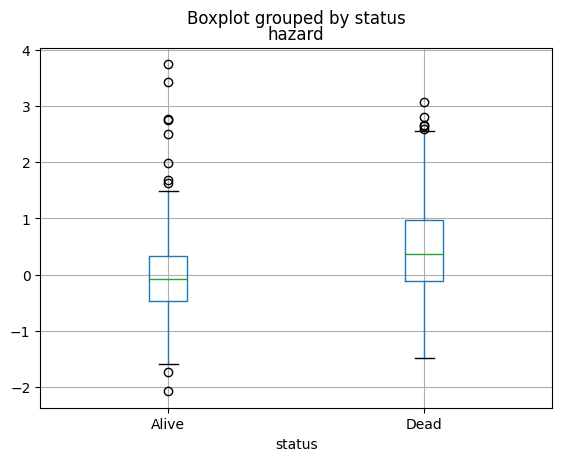

In [ ]:
results.boxplot(column='hazard', by='status')

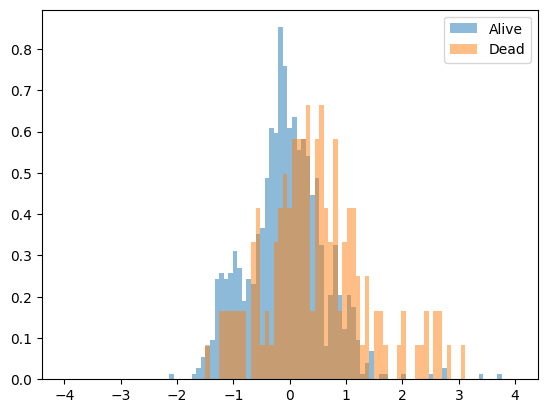

In [ ]:
bins = np.linspace(-4, 4, 100)

plt.hist(results[results['status']=='Alive']['hazard'], bins, alpha=0.5, label='Alive', density=True)
plt.hist(results[results['status']=='Dead']['hazard'], bins, alpha=0.5, label='Dead', density=True)
plt.legend(loc='upper right')
plt.show()

### **2.2. Visualizaciones Interactivas**
---

* Cree visualizaciones interactivas, como gráficos dinámicos o tableros interactivos y proporcione instrucciones claras sobre cómo interactuar con ellos.
* Explore cómo estas visualizaciones ayudan en la exploración de datos y documente su análisis.

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=len(one_hot_categorical), subplot_titles=one_hot_categorical)

for i, column_name in enumerate(one_hot_categorical):
  column = data[column_name]
  uniques = np.unique(column)

  for value in uniques:
    kmf = KaplanMeierFitter()
    kmf.fit(durations = adapted_data[data[column_name]==value]['Time'], event_observed = adapted_data[data[column_name]==value]['vital_status'])
    times, prob = kmf.survival_function_.index, kmf.survival_function_.KM_estimate
    upper, lower = kmf.confidence_interval_['KM_estimate_upper_0.95'], kmf.confidence_interval_['KM_estimate_lower_0.95']

    fig.add_trace(go.Scatter(x=times, y=prob, name=f'{value}'),row=1, col=i+1)
    #fig.add_trace(go.Scatter(x=times, y=upper,fill=None,mode='lines'),row=1, col=i+1)
    #fig.add_trace(go.Scatter(x=times,y=lower,fill='tonexty', mode='lines'),row=1, col=i+1)
    fig['layout'][f'xaxis{i+1}']['title']='Time'
    fig['layout'][f'yaxis{i+1}']['title']='Surb prob'

fig.update_layout(height=500, width=3000, title_text="Kaplan Meier curves by feature")
fig.show()

### **2.3. Visualización de Mapas Coropléticos (Opcional)**
---

* Si aplica mapas coropléticos para representar datos geoespaciales, incluya estas visualizaciones.
* Explique la elección de este tipo de visualización y cómo ésta contribuye a la comprensión de patrones geográficos y a la solución planteada.

In [ ]:
# -No aplica

## **3. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1.   La mayoria de variables clinicas se encuentras relacionadas entre si.
2.  El numero de comparaciones hace necesario considerar las corrección de bonferroni lo que implica en un crecimiento del error tipo 2.
3.  Las variables: 'radiation_therapy', 'menopause_status', 'menopause_status', 'pathologic_N', 'pathologic_M', 'lymph_node_examined_count', se encuentran relacionadas con la sobrevivencia del paciente.  
4.   A pesar de la relación de sobrevivencia la estimación del sobrevivencia presenta una baja bondad de ajuste (C-index: 0.74)



## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*